In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.quadratic_double_banana_pullback_manifold import QuadraticDoubleBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


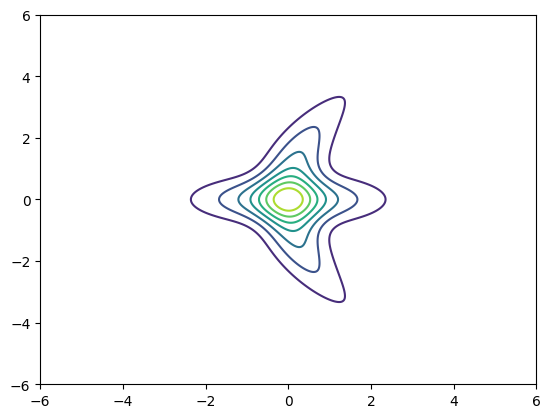

In [2]:
double_banana_manifold = QuadraticDoubleBananaPullbackManifold()

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])
x2 = torch.tensor([2.,0.])

p = 10

torch.Size([1, 1])
iteration 1 | rel_error = 1.414764642715454
iteration 2 | rel_error = 0.6376422047615051
iteration 3 | rel_error = 0.285639226436615
iteration 4 | rel_error = 0.12278545647859573
iteration 5 | rel_error = 0.05308596044778824
iteration 6 | rel_error = 0.022847557440400124
iteration 7 | rel_error = 0.00984877534210682
iteration 8 | rel_error = 0.004242153372615576
iteration 9 | rel_error = 0.001827811822295189
iteration 10 | rel_error = 0.0007877869065850973
gradient descent was terminated after reaching a relative error 0.0007877869065850973 in 10 iterations


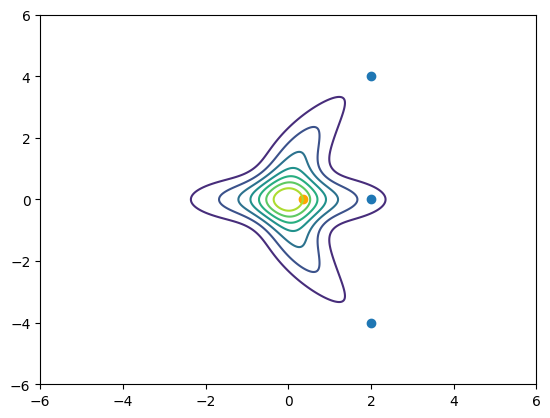

In [4]:
# test barycentre # TODO this might be very hard to compute...
x=torch.zeros((3,2))
x[0] = x0
x[1] = x1
x[2] = x2

barycentre = double_banana_manifold.barycentre(x).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.scatter(barycentre[0], barycentre[1], color="orange")
plt.savefig("results/quadratic_double_banana/barycentre.eps")
plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[8.1250, 0.0000],
         [0.0000, 8.0312]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])
tensor([[[ 0.2643,  0.0000],
         [ 0.0000, 15.9855]]])


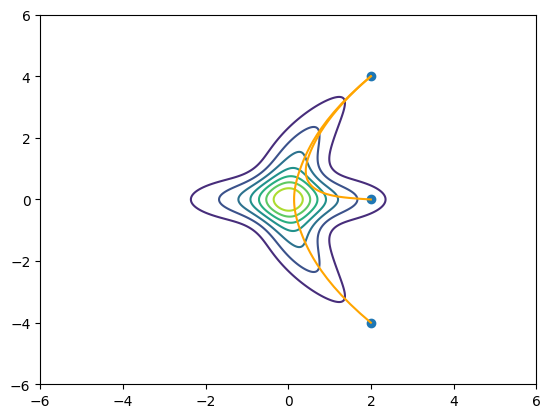

In [6]:
# test interpolation
t = torch.linspace(0.,1.,100)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t,p=p).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t,p=p).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

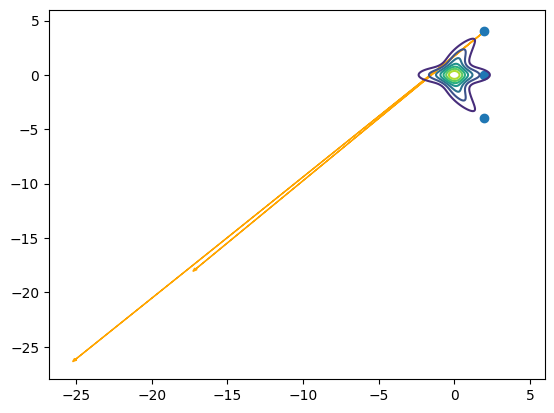

In [7]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/logarithmic.eps")
plt.show()

# ps = [10,20,30,40,50,60,70,80,90,100]
# error_to_ref = torch.zeros(len(ps), 2)
# for i, p in enumerate(ps):
#     logarithmic_x0_x1_p = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
#     logarithmic_x0_x2_p = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

#     error_to_ref[i,0] = torch.norm(torch.tensor(logarithmic_x0_x1_p) - torch.tensor(logarithmic_x0_x1))
#     error_to_ref[i,1] = torch.norm(torch.tensor(logarithmic_x0_x2_p) - torch.tensor(logarithmic_x0_x2))

#     plt.contour(x_grid, y_grid, density_banana)
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x1_p[0], logarithmic_x0_x1_p[1], head_width=0.2, color="orange")
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x2_p[0], logarithmic_x0_x2_p[1], head_width=0.2, color="orange")
#     plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
#     plt.savefig(f"results/quadratic_double_banana/logarithmic_p{p}.eps")
#     plt.show()


# plt.plot(ps, error_to_ref)
# plt.savefig("results/quadratic_double_banana/logarithmic_stability.eps")
# plt.show()

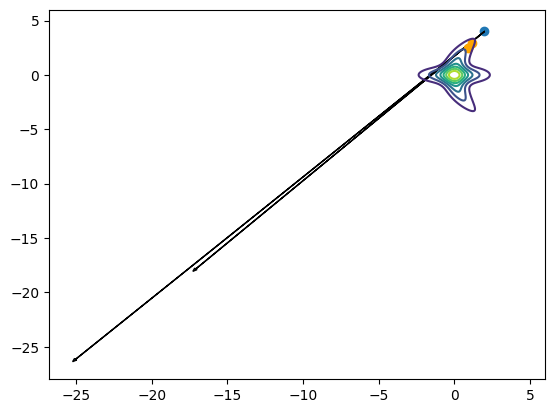

The error between exp_x0(log_x0 (x1)) and x1 is 6.601390361785889
The error between exp_x0(log_x0 (x2)) and x2 is 3.0276389122009277


In [8]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None], p=p)[0].detach().numpy()
exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None], p=p)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="orange")
plt.savefig("results/quadratic_double_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [9]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

NameError: name 'banana_manifold' is not defined

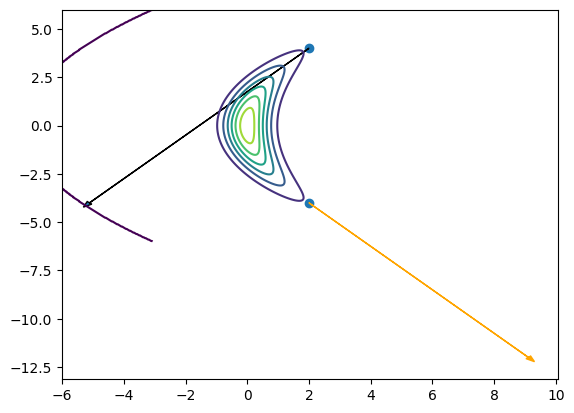

In [ ]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_double_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


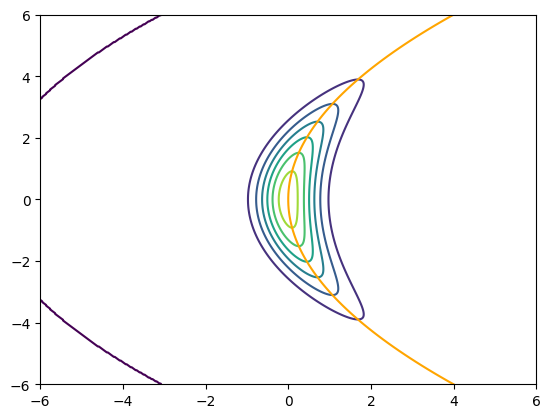

In [ ]:
# Riemannian autoencoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/quadratic_double_banana/rae_manifold.eps")
plt.show()